## **Importing libraries**

In [ ]:
import os # imports the os module for interacting with the operating system
import numpy as np # imports the numpy library and assigns it to the alias "np" for numerical operations
import pandas as pd # imports the pandas library and assigns it to the alias "pd" for data manipulation and analysis
from sklearn.preprocessing import LabelEncoder # imports the LabelEncoder class from sklearn.preprocessing for encoding categorical labels
from sklearn.model_selection import train_test_split # imports the train_test_split function from sklearn.model_selection for splitting data into training and testing sets
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score # imports metrics functions from sklearn.metrics for evaluating model performance
from keras.models import Sequential # imports the Sequential class from keras.models for building sequential neural networks
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout # imports various layer types from keras.layers for constructing CNNs
from keras.utils import to_categorical # imports the to_categorical function from keras.utils for one-hot encoding of categorical labels
from tensorflow.keras.callbacks import EarlyStopping # imports the EarlyStopping callback from tensorflow.keras.callbacks for stopping training early if no improvement is observed
from sklearn.model_selection import StratifiedKFold # imports the StratifiedKFold class from sklearn.model_selection for performing stratified k-fold cross-validation
from tensorflow.keras.optimizers import Adam # imports the Adam optimizer from tensorflow.keras.optimizers for optimizing model parameters
import matplotlib.pyplot as plt # imports the matplotlib.pyplot library and assigns it to the alias "plt" for plotting and visualization
import tensorflow as tf # imports the tensorflow library and assigns it to the alias "tf" for deep learning operations
import time # imports the time module for measuring execution time
from tensorflow.keras import layers # imports the layers module from tensorflow.keras for accessing various layer types
import matplotlib.pyplot as plt # imports the matplotlib.pyplot library and assigns it to the alias "plt" for plotting and visualization (duplicate import)
import seaborn as sns # imports the seaborn library and assigns it to the alias "sns" for statistical data visualization

## **Loading data**

In [ ]:
# function to read the EEG data from text files and label them
def load_data_from_folder(folder_path, label):
    data_list = []
    for file_name in os.listdir(folder_path):
      # organize file paths with the root folder path + file name
        file_path = os.path.join(folder_path, file_name)
        data = np.loadtxt(file_path)
        data_list.append(data)
    data_array = np.vstack(data_list)
    labels = np.array([label] * data_array.shape[0])
    return data_array, labels

# dictionnary that maps labels to folder paths
paths = {
    # Set A
    'A': '/content/drive/MyDrive/bonn_dataset/Z', # Class 0: Healthy with eyes open
    # Set B
    'B': '/content/drive/MyDrive/bonn_dataset/O', # Class 1: Healthy with eyes closed
    # Set C
    'C': '/content/drive/MyDrive/bonn_dataset/N', # Class 2: Epileptic patient during interictal hippocampal formation
    # Set D
    'D': '/content/drive/MyDrive/bonn_dataset/F', # Class 3: Epileptic patient during interictal epileptogenic zone
    # Set E
    'E': '/content/drive/MyDrive/bonn_dataset/S'  # Class 4: Epileptic patient during a seizure (ictal)
}

def prepare_data_for_classification(classes):
    X, y = [], []
    for label, class_id in enumerate(classes):
        folder_path = paths[class_id]
        data, labels = load_data_from_folder(folder_path, label)
        X.append(data)
        y.append(labels)
    X = np.concatenate(X)
    y = np.concatenate(y)
    return X, y


# Define the CNN model architecture

In [ ]:
def build_cnn(input_shape, filters, kernel_size, pool_size, dense_units, dropout_rates, learning_rate):
    model = Sequential() # creates a Sequential model object
    model.add(Conv1D(filters=filters[0], kernel_size=kernel_size, activation='relu', input_shape=input_shape)) # adds a 1D convolutional layer with ReLU activation to the model
    model.add(MaxPooling1D(pool_size=pool_size)) # adds a 1D max pooling layer to the model
    model.add(Dropout(dropout_rates[0])) # adds a dropout layer to the model

    model.add(Conv1D(filters=filters[1], kernel_size=kernel_size, activation='relu')) # adds another 1D convolutional layer with ReLU activation to the model
    model.add(MaxPooling1D(pool_size=pool_size)) # adds another 1D max pooling layer to the model
    model.add(Dropout(dropout_rates[1])) # adds another dropout layer to the model

    model.add(Flatten()) # adds a Flatten layer to convert the multi-dimensional output to a 1D vector
    model.add(Dense(dense_units, activation='relu')) # adds a dense layer with ReLU activation to the model
    model.add(Dropout(dropout_rates[2])) # adds another dropout layer to the model

    model.add(Dense(1, activation='sigmoid')) # adds a dense layer with sigmoid activation for binary classification
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy']) # compiles the model with Adam optimizer, binary cross-entropy loss, and accuracy metric
    return model # returns the compiled model


Model Initialization: A Sequential model is created, which allows adding layers in a sequential manner.

Convolutional Layers: Two Conv1D layers are added. These layers apply filters to the input data to extract features.

filters: The number of filters determines the number of features to learn.
kernel_size: The size of the filter, which slides over the input data.
activation='relu': The ReLU activation function introduces non-linearity, enabling the model to learn complex patterns.
Max Pooling Layers: Two MaxPooling1D layers are added after each convolutional layer. These layers reduce the dimensionality of the feature maps, making the model more robust to small variations in the input data.

pool_size: The size of the pooling window.
Dropout Layers: Three Dropout layers are added to prevent overfitting. These layers randomly drop out neurons during training, forcing the model to learn more robust features.

dropout_rates: The probability of dropping out a neuron.
Flatten Layer: A Flatten layer converts the multi-dimensional output of the convolutional layers into a one-dimensional vector.

Dense Layers: Two Dense layers are added. These are fully connected layers where each neuron receives input from all neurons in the previous layer.

dense_units: The number of neurons in the dense layer.
activation='relu': The ReLU activation function is used in the first dense layer.
activation='sigmoid': The sigmoid activation function is used in the output layer to produce a probability between 0 and 1 for binary classification.
Model Compilation: The model is compiled with the following:

optimizer=Adam(learning_rate=learning_rate): The Adam optimizer is used to update the model's weights during training.
loss='binary_crossentropy': The binary cross-entropy loss function is used for binary classification.
metrics=['accuracy']: The accuracy metric is used to evaluate the model's performance.
Return Model: The compiled model is returned.

# Plot the training and validation loss and accuracy

In [ ]:
def plot_cnn_loss_accuracy(history, title):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()


# Evaluate the model's performance

In [ ]:
def evaluate_cnn_model(model, X_test, y_test, title):
    y_pred = model.predict(X_test) # predicts the labels for the test data using the trained model
    y_pred_labels = (y_pred > 0.5).astype(int) # converts the predicted probabilities to binary labels (0 or 1) based on a threshold of 0.5

    loss, accuracy = model.evaluate(X_test, y_test, verbose=0) # evaluates the model on the test data and retrieves the loss and accuracy
    recall = recall_score(y_test, y_pred_labels)  # Sensitivity # calculates the recall (sensitivity) score
    f1 = f1_score(y_test, y_pred_labels) # calculates the F1 score

    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred_labels) # computes the confusion matrix
    tn, fp, fn, tp = conf_matrix.ravel() # extracts the true negative, false positive, false negative, and true positive values from the confusion matrix

    # Calculate specificity
    specificity = tn / (tn + fp) if (tn + fp) != 0 else 0 # calculates the specificity score

    print(f'{title} - Loss: {loss:.4f}') # prints the loss value
    print(f'{title} - Accuracy: {accuracy:.4f}') # prints the accuracy value
    print(f'{title} - Sensitivity: {recall:.4f}') # prints the sensitivity value
    print(f'{title} - Specificity: {specificity:.4f}') # prints the specificity value
    print(f'{title} - F1 Score: {f1:.4f}') # prints the F1 score value

    plt.figure(figsize=(6, 6)) # creates a figure for the confusion matrix plot
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False) # creates a heatmap of the confusion matrix
    plt.title('Confusion Matrix') # sets the title of the plot
    plt.ylabel('True Label') # sets the y-axis label
    plt.xlabel('Predicted Label') # sets the x-axis label
    plt.show() # displays the plot

# Execute Model Training and Evaluation

In [ ]:
def run_cnn_classification(classes_1, classes_2, title, filters, kernel_size, pool_size, dense_units, dropout_rates, learning_rate, batch_size, epochs):
    start_time = time.time() # records the start time

    X_1, y_1 = prepare_data_for_classification(classes_1) # prepares data for the first class
    X_2, y_2 = prepare_data_for_classification(classes_2) # prepares data for the second class
    X = np.concatenate([X_1, X_2]) # concatenates the data from both classes
    y = np.concatenate([np.zeros(len(y_1)), np.ones(len(y_2))]) # creates labels for both classes (0 for the first class, 1 for the second class)

    # Reshape data for CNN
    X = np.expand_dims(X, axis=-1) # reshapes the data to add an extra dimension for the CNN

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # splits the data into training and testing sets

    model = build_cnn(X_train.shape[1:], filters, kernel_size, pool_size, dense_units, dropout_rates, learning_rate) # builds the CNN model
    history = model.fit(X_train, y_train, validation_split=0.2, epochs=epochs, batch_size=batch_size, verbose=1) # trains the model

    plot_cnn_loss_accuracy(history, title) # plots the loss and accuracy curves
    evaluate_cnn_model(model, X_test, y_test, title) # evaluates the model

    end_time = time.time() # records the end time
    elapsed_time = end_time - start_time # calculates the elapsed time
    minutes, seconds = divmod(elapsed_time, 60) # converts elapsed time to minutes and seconds
    print(f'{title} - Computational Time: {int(minutes)} minutes and {int(seconds)} seconds') # prints the computational time


# Classification #1 :Healthy (A-B) - Epileptic (C-D-E)



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 713ms/step - accuracy: 0.6098 - loss: 279.1916 - val_accuracy: 0.6000 - val_loss: 19.6941
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 579ms/step - accuracy: 0.6109 - loss: 43.3938 - val_accuracy: 0.6125 - val_loss: 3.2546
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 694ms/step - accuracy: 0.6149 - loss: 10.2769 - val_accuracy: 0.5625 - val_loss: 4.3640
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 510ms/step - accuracy: 0.7178 - loss: 3.2097 - val_accuracy: 0.5750 - val_loss: 0.7117
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 769ms/step - accuracy: 0.6932 - loss: 1.6677 - val_accuracy: 0.5375 - val_loss: 0.7119
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 476ms/step - accuracy: 0.7025 - loss: 0.9275 - val_accuracy: 0.6000 - val_loss: 0.7251
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 470ms/step - accuracy: 0.7412 - loss: 0.9445 - val_accuracy: 0.5875 - val_loss: 0.7275
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 683ms/step - accuracy: 0.7783 - loss: 0.6799 - val_accur

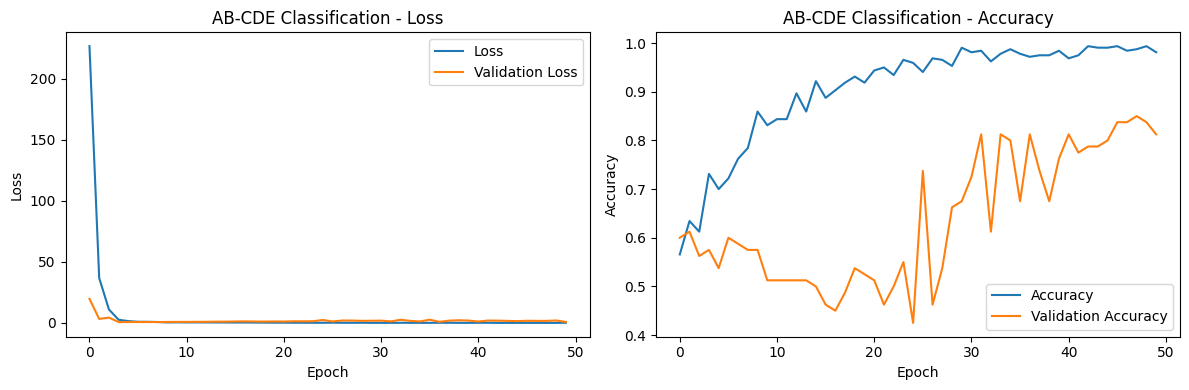

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
AB-CDE Classification - Loss: 0.7871
AB-CDE Classification - Accuracy: 0.8100
AB-CDE Classification - Sensitivity: 0.9655
AB-CDE Classification - Specificity: 0.5952
AB-CDE Classification - F1 Score: 0.8550


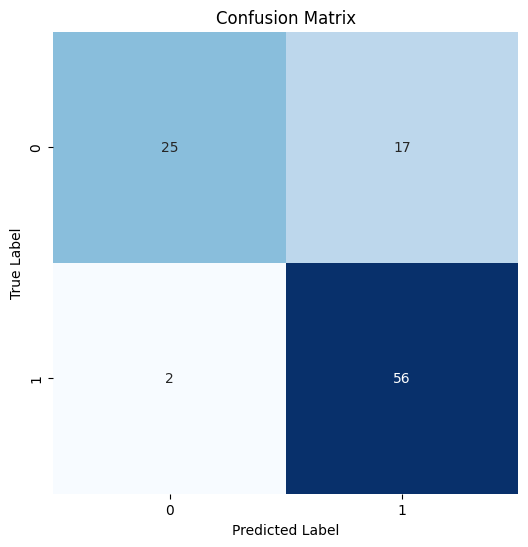

AB-CDE Classification - Computational Time: 6 minutes and 26 seconds


In [ ]:
# Parameters for AB-CDE Classification
filters_ab_cde = [55, 59]
kernel_size_ab_cde = 4
pool_size_ab_cde = 2
dense_units_ab_cde = 176
dropout_rates_ab_cde = [0.281, 0.289, 0.488]
learning_rate_ab_cde = 0.001
batch_size_ab_cde = 32
epochs_ab_cde = 50

run_cnn_classification(
    classes_1=['A', 'B'], classes_2=['C', 'D', 'E'],
    title='AB-CDE Classification',
    filters=filters_ab_cde,
    kernel_size=kernel_size_ab_cde,
    pool_size=pool_size_ab_cde,
    dense_units=dense_units_ab_cde,
    dropout_rates=dropout_rates_ab_cde,
    learning_rate=learning_rate_ab_cde,
    batch_size=batch_size_ab_cde,
    epochs=epochs_ab_cde
)


# Classification #2 : Healthy (Open eyes) - Seizure (A-E)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 608ms/step - accuracy: 0.5448 - loss: 537.5426 - val_accuracy: 0.5312 - val_loss: 119.9184
Epoch 2/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 585ms/step - accuracy: 0.4604 - loss: 344.1304 - val_accuracy: 0.5312 - val_loss: 222.2925
Epoch 3/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 893ms/step - accuracy: 0.5542 - loss: 223.4107 - val_accuracy: 0.5625 - val_loss: 36.8853
Epoch 4/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 537ms/step - accuracy: 0.6708 - loss: 130.4564 - val_accuracy: 0.5312 - val_loss: 135.1383
Epoch 5/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 519ms/step - accuracy: 0.5323 - loss: 174.1052 - val_accuracy: 0.5312 - val_loss: 124.8616
Epoch 6/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 522ms/step - accuracy: 0.5625 - loss: 129.5273 - val_accuracy: 0.5312 - val_loss: 33.9669
Epoch 7/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 586ms/step - accuracy: 0.6760 - loss: 60.5804 - val_accuracy: 0.6562 - val_loss: 20.6048
Epoch 8/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 863ms/step - accuracy: 0.6844 - loss: 86.5712 - val_acc

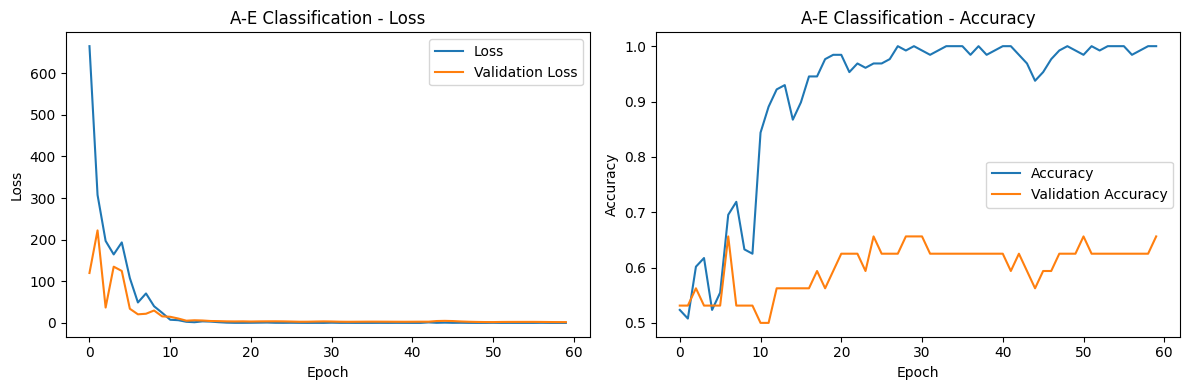

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
A-E Classification - Loss: 3.3644
A-E Classification - Accuracy: 0.6000
A-E Classification - Sensitivity: 0.8947
A-E Classification - Specificity: 0.3333
A-E Classification - F1 Score: 0.6800


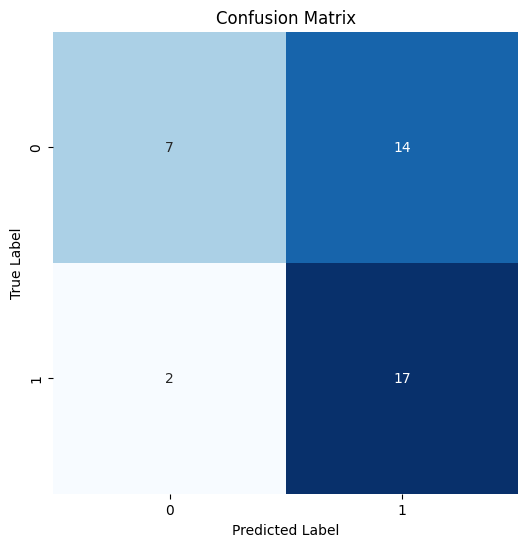

A-E Classification - Computational Time: 2 minutes and 58 seconds


In [ ]:
# Parameters for A-E Classification
filters_a_e = [18, 128]
kernel_size_a_e = 3
pool_size_a_e = 2
dense_units_a_e = 128
dropout_rates_a_e = [0.299, 0.350, 0.389]
learning_rate_a_e = 0.001
batch_size_a_e = 32
epochs_a_e = 60


run_cnn_classification(
    classes_1=['A'], classes_2=['E'],
    title='A-E Classification',
    filters=filters_a_e,
    kernel_size=kernel_size_a_e,
    pool_size=pool_size_a_e,
    dense_units=dense_units_a_e,
    dropout_rates=dropout_rates_a_e,
    learning_rate=learning_rate_a_e,
    batch_size=batch_size_a_e,
    epochs=epochs_a_e
)


# Classification #3 : Healthy (Close eyes) - Seizure  (B-E)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 819ms/step - accuracy: 0.4948 - loss: 1366.2065 - val_accuracy: 0.5312 - val_loss: 211.7728
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 760ms/step - accuracy: 0.4625 - loss: 347.0654 - val_accuracy: 0.5312 - val_loss: 102.3317
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5240 - loss: 142.4884 - val_accuracy: 0.5312 - val_loss: 84.8240
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 661ms/step - accuracy: 0.5250 - loss: 113.8553 - val_accuracy: 0.5625 - val_loss: 9.8994
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 673ms/step - accuracy: 0.7073 - loss: 24.2181 - val_accuracy: 0.6250 - val_loss: 17.6797
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 692ms/step - accuracy: 0.6583 - loss: 43.9863 - val_accuracy: 0.6562 - val_loss: 1.9214
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 884ms/step - accuracy: 0.6823 - loss: 14.2482 - val_accuracy: 0.6562 - val_loss: 0.6993
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 666ms/step - accuracy: 0.7271 - loss: 3.8779 - val_accuracy: 0.

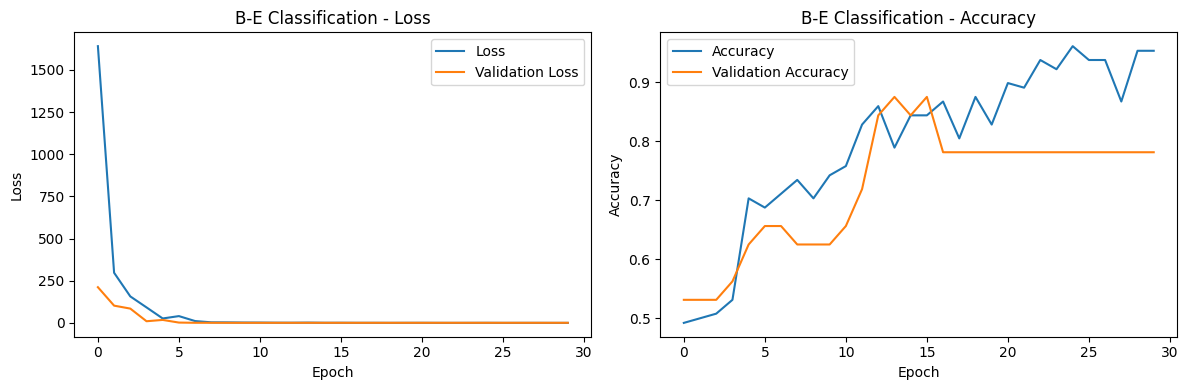

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
B-E Classification - Loss: 0.7570
B-E Classification - Accuracy: 0.6500
B-E Classification - Sensitivity: 0.2632
B-E Classification - Specificity: 1.0000
B-E Classification - F1 Score: 0.4167


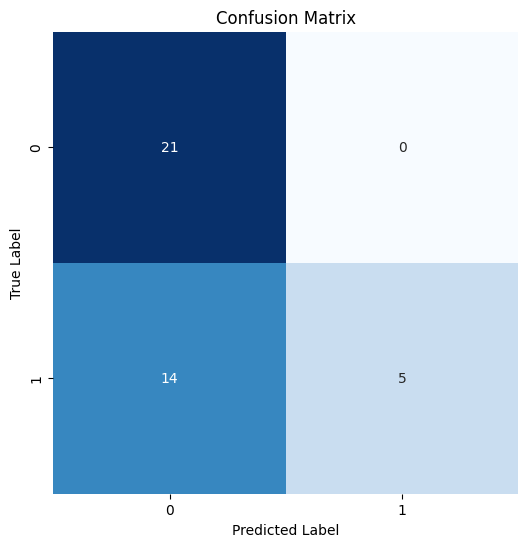

B-E Classification - Computational Time: 2 minutes and 26 seconds


In [ ]:
# Parameters for B-E Classification
filters_b_e = [24, 110]
kernel_size_b_e = 4
pool_size_b_e = 2
dense_units_b_e = 185
dropout_rates_b_e = [0.28, 0.34, 0.41]
learning_rate_b_e = 0.0018
batch_size_b_e = 32
epochs_b_e = 30

run_cnn_classification(
    classes_1=['B'], classes_2=['E'],
    title='B-E Classification',
    filters=filters_b_e,
    kernel_size=kernel_size_b_e,
    pool_size=pool_size_b_e,
    dense_units=dense_units_b_e,
    dropout_rates=dropout_rates_b_e,
    learning_rate=learning_rate_b_e,
    batch_size=batch_size_b_e,
    epochs=epochs_b_e
)


# Classification #4 : Healthy (Open eyes) - Epileptic patient during interictal hippocampal zone  (A-C)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 690ms/step - accuracy: 0.3917 - loss: 116.6950 - val_accuracy: 0.6250 - val_loss: 10.0816
Epoch 2/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 584ms/step - accuracy: 0.5250 - loss: 71.0231 - val_accuracy: 0.7500 - val_loss: 5.3780
Epoch 3/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 571ms/step - accuracy: 0.6667 - loss: 32.5199 - val_accuracy: 0.8438 - val_loss: 5.1972
Epoch 4/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 602ms/step - accuracy: 0.7448 - loss: 17.6788 - val_accuracy: 0.9062 - val_loss: 2.0042
Epoch 5/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 570ms/step - accuracy: 0.8875 - loss: 5.0571 - val_accuracy: 0.5625 - val_loss: 7.1041
Epoch 6/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 900ms/step - accuracy: 0.8802 - loss: 3.3926 - val_accuracy: 0.8438 - val_loss: 2.2809
Epoch 7/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 821ms/step - accuracy: 0.8667 - loss: 3.8347 - val_accuracy: 0.8438 - val_loss: 1.7788
Epoch 8/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 569ms/step - accuracy: 0.8948 - loss: 2.3252 - val_accuracy: 0.8750 - val

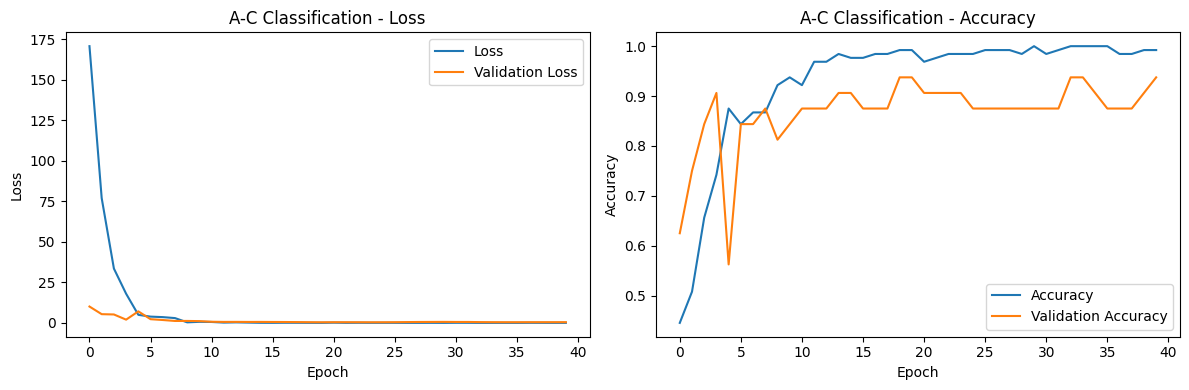

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
A-C Classification - Loss: 0.1783
A-C Classification - Accuracy: 0.9500
A-C Classification - Sensitivity: 0.8947
A-C Classification - Specificity: 1.0000
A-C Classification - F1 Score: 0.9444


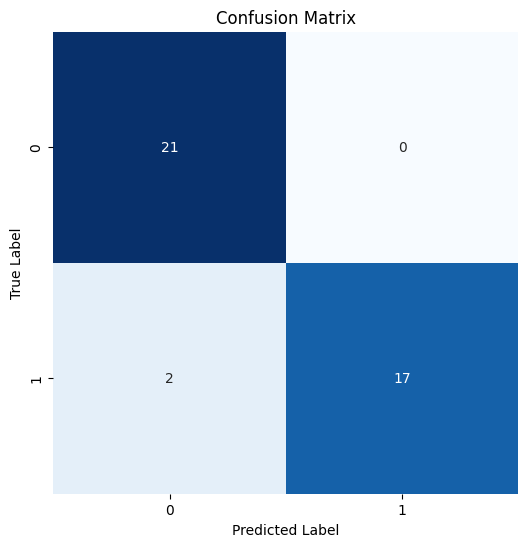

A-C Classification - Computational Time: 2 minutes and 9 seconds


In [ ]:
# Parameters for A-C Classification
filters_a_c = [24, 128]
kernel_size_a_c = 3
pool_size_a_c = 2
dense_units_a_c = 128
dropout_rates_a_c = [0.25, 0.25, 0.5]
learning_rate_a_c = 0.001
batch_size_a_c = 32
epochs_a_c = 40

run_cnn_classification(
    classes_1=['A'], classes_2=['C'],
    title='A-C Classification',
    filters=filters_a_c,
    kernel_size=kernel_size_a_c,
    pool_size=pool_size_a_c,
    dense_units=dense_units_a_c,
    dropout_rates=dropout_rates_a_c,
    learning_rate=learning_rate_a_c,
    batch_size=batch_size_a_c,
    epochs=epochs_a_c
)


# Classification #5 : Healthy (Closed eyes) - Epileptic patient during interictal epileptogenic zone (B-D)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 493ms/step - accuracy: 0.5740 - loss: 156.1855 - val_accuracy: 0.5000 - val_loss: 26.9037
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 309ms/step - accuracy: 0.6167 - loss: 45.4757 - val_accuracy: 0.5625 - val_loss: 16.9227
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 289ms/step - accuracy: 0.7344 - loss: 27.2160 - val_accuracy: 0.6875 - val_loss: 13.6241
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 303ms/step - accuracy: 0.7250 - loss: 16.0776 - val_accuracy: 0.9375 - val_loss: 1.3692
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 293ms/step - accuracy: 0.8396 - loss: 5.5913 - val_accuracy: 0.7812 - val_loss: 6.9956
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 296ms/step - accuracy: 0.8302 - loss: 6.1319 - val_accuracy: 0.9375 - val_loss: 1.1811
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 289ms/step - accuracy: 0.8896 - loss: 1.4997 - val_accuracy: 0.9062 - val_loss: 2.6619
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 296ms/step - accuracy: 0.8771 - loss: 1.5915 - val_accuracy: 0.9688 - v

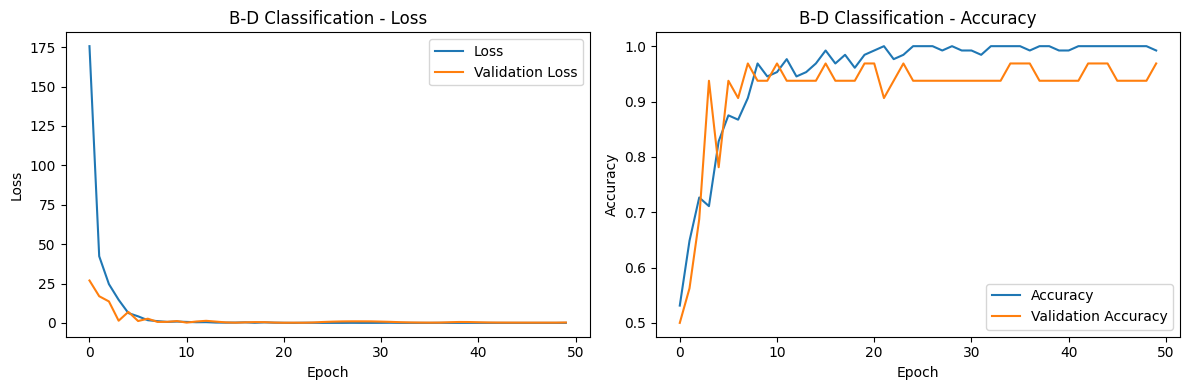

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
B-D Classification - Loss: 0.2281
B-D Classification - Accuracy: 0.9500
B-D Classification - Sensitivity: 0.9474
B-D Classification - Specificity: 0.9524
B-D Classification - F1 Score: 0.9474


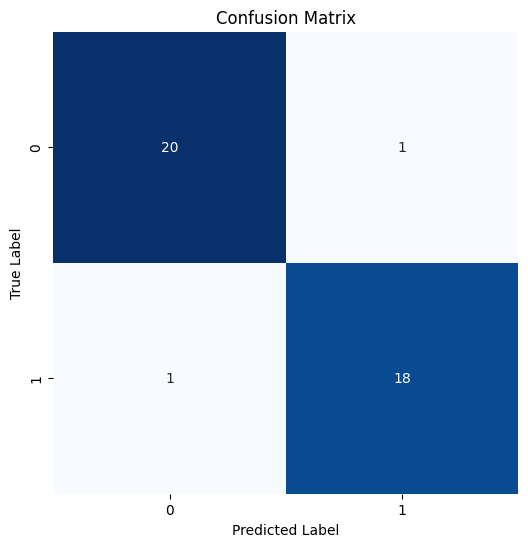

B-D Classification - Computational Time: 1 minutes and 34 seconds


In [ ]:
# Parameters for B-D Classification
filters_b_d = [32, 64]
kernel_size_b_d = 3
pool_size_b_d = 2
dense_units_b_d = 128
dropout_rates_b_d = [0.2, 0.3, 0.4]
learning_rate_b_d = 0.001
batch_size_b_d = 32
epochs_b_d = 50

run_cnn_classification(
    classes_1=['B'], classes_2=['D'],
    title='B-D Classification',
    filters=filters_b_d,
    kernel_size=kernel_size_b_d,
    pool_size=pool_size_b_d,
    dense_units=dense_units_b_d,
    dropout_rates=dropout_rates_b_d,
    learning_rate=learning_rate_b_d,
    batch_size=batch_size_b_d,
    epochs=epochs_b_d
)


# Classification #6 :  Epileptic patient during interictal hippocampal zone - Epileptic patient during seizure (C-E)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 785ms/step - accuracy: 0.4990 - loss: 424.7204 - val_accuracy: 0.5312 - val_loss: 460.9218
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 805ms/step - accuracy: 0.4875 - loss: 667.0820 - val_accuracy: 0.5938 - val_loss: 69.4808
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 852ms/step - accuracy: 0.6469 - loss: 90.1852 - val_accuracy: 0.5312 - val_loss: 68.1434
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 940ms/step - accuracy: 0.7969 - loss: 40.8323 - val_accuracy: 0.7188 - val_loss: 9.9191
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.7146 - loss: 11.2791 - val_accuracy: 0.5312 - val_loss: 9.2385
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 706ms/step - accuracy: 0.6042 - loss: 16.7524 - val_accuracy: 0.5938 - val_loss: 2.9390
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 708ms/step - accuracy: 0.7240 - loss: 6.3083 - val_accuracy: 0.7812 - val_loss: 0.6971
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.8365 - loss: 0.6900 - val_accuracy: 0.8750 - val

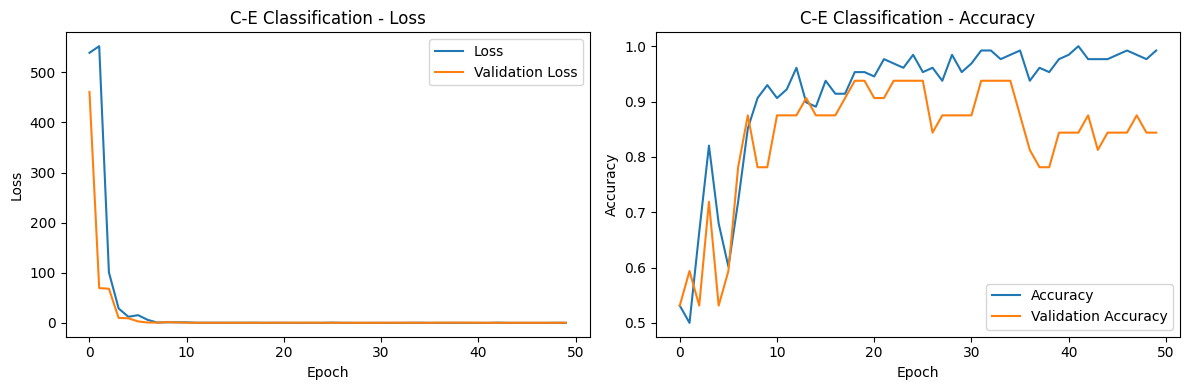

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
C-E Classification - Loss: 0.5125
C-E Classification - Accuracy: 0.7500
C-E Classification - Sensitivity: 1.0000
C-E Classification - Specificity: 0.5238
C-E Classification - F1 Score: 0.7917


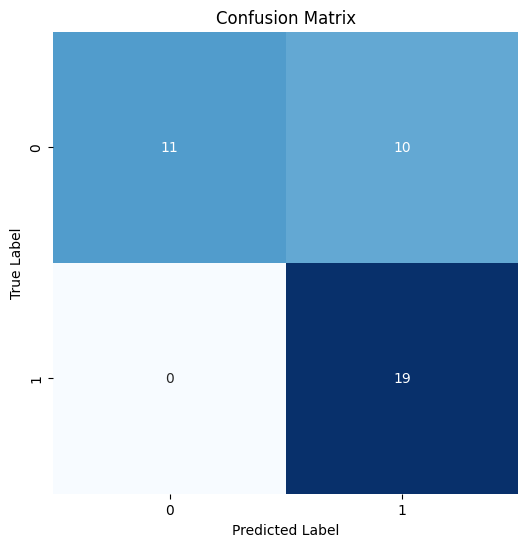

C-E Classification - Computational Time: 3 minutes and 55 seconds


In [ ]:
# Parameters for C-E Classification
filters_c_e = [28, 120]
kernel_size_c_e = 4
pool_size_c_e = 2
dense_units_c_e = 200
dropout_rates_c_e = [0.25, 0.32, 0.38]
learning_rate_c_e = 0.002
batch_size_c_e = 32
epochs_c_e = 50

run_cnn_classification(
    classes_1=['C'], classes_2=['E'],
    title='C-E Classification',
    filters=filters_c_e,
    kernel_size=kernel_size_c_e,
    pool_size=pool_size_c_e,
    dense_units=dense_units_c_e,
    dropout_rates=dropout_rates_c_e,
    learning_rate=learning_rate_c_e,
    batch_size=batch_size_c_e,
    epochs=epochs_c_e
)
